In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


In [47]:
# Load the dataset from CSV file
data = pd.read_csv(r"E:\Campus\CodeAlpha\Car price prediction(used cars)\car data.csv")
data.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [48]:
# Exploratory Data Analysis

print("Dataset Overview:")
print(data.info())



Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [49]:

print("\nStatistical Summary:")
print(data.describe())



Statistical Summary:
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [50]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


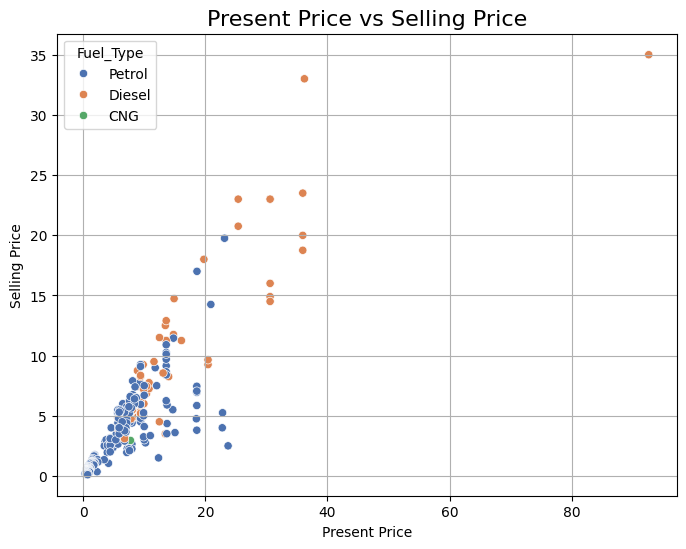

In [51]:
# Scatter plot for 'Present_Price' vs 'Selling_Price'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Present_Price', y='Selling_Price', hue='Fuel_Type', palette='deep')
plt.title('Present Price vs Selling Price', fontsize=16)
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.grid()
plt.show()


In [52]:
# Data Cleaning
if data.isnull().sum().sum() > 0:
    data.dropna(inplace=True)
data.drop_duplicates(inplace=True)


In [53]:
# Outlier detection and removal
for col in ['Present_Price', 'Driven_kms']:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


In [54]:
# Feature engineering
data['Car_Age'] = 2025 - data['Year']
data.drop(['Car_Name', 'Year'], axis=1, inplace=True)


In [55]:
# One-hot encoding
data = pd.get_dummies(data, drop_first=True)


In [56]:
# Features and target variable
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']


In [57]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [59]:
# Fit the GridSearchCV
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid={
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

In [60]:
# Fit the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error')

In [61]:
# Access the best model
best_model = grid_search.best_estimator_

In [62]:
# Predictions
y_pred = best_model.predict(X_test)

In [63]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Best Parameters: {grid_search.best_params_}")


Mean Absolute Error: 0.3891669221033426
Mean Squared Error: 0.37549680767472005
R^2 Score: 0.956730185370629
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


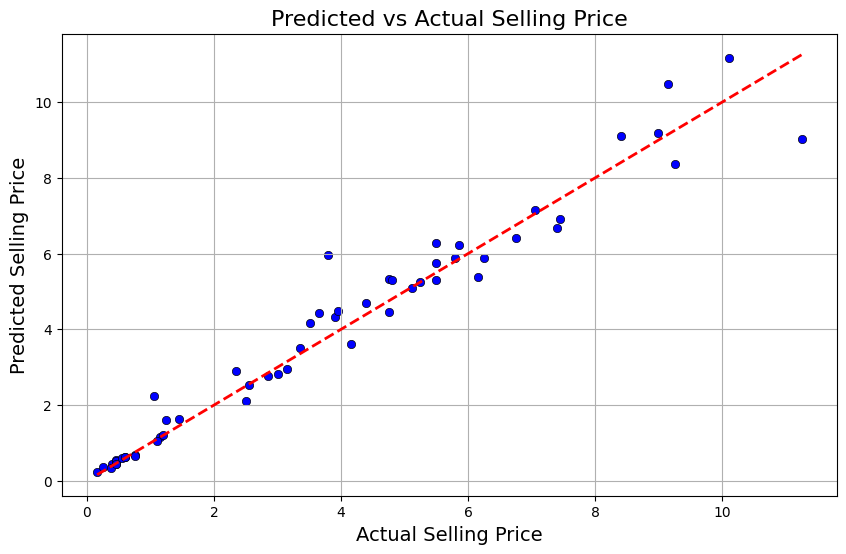

In [64]:
# Visualization: Predicted vs Actual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle='--')
plt.title('Predicted vs Actual Selling Price', fontsize=16)
plt.xlabel('Actual Selling Price', fontsize=14)
plt.ylabel('Predicted Selling Price', fontsize=14)
plt.grid()
plt.show()


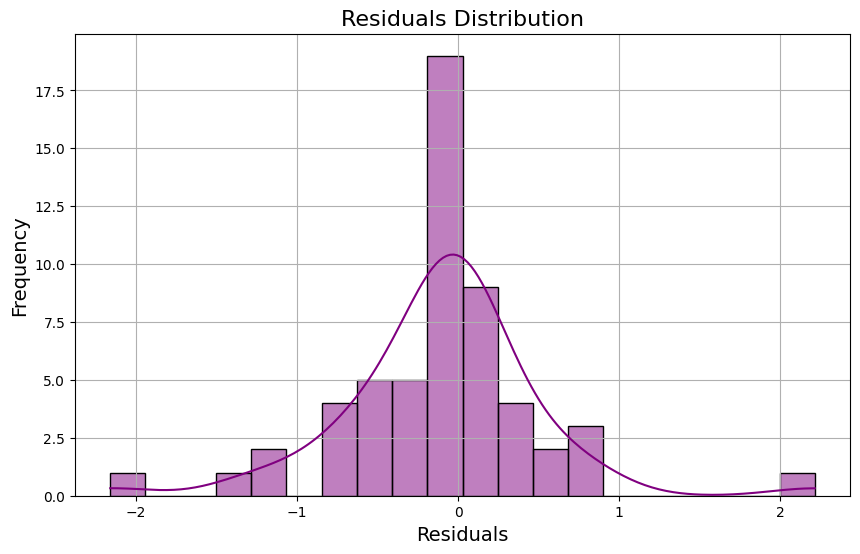

In [65]:
# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple', bins=20)
plt.title('Residuals Distribution', fontsize=16)
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()
plt.show()


In [66]:
# Save the model to a file
joblib.dump(best_model, 'E:\Campus\CodeAlpha\Car price prediction(used cars)\car_price_prediction_model.pkl')

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\sande\AppData\Local\Temp\ipykernel_10444\309434811.py:2: SyntaxWarning: invalid escape sequence '\C'
  joblib.dump(best_model, 'E:\Campus\CodeAlpha\Car price prediction(used cars)\car_price_prediction_model.pkl')


['E:\\Campus\\CodeAlpha\\Car price prediction(used cars)\\car_price_prediction_model.pkl']

In [67]:
# Load the model and make a prediction
loaded_model = joblib.load(r'E:\Campus\CodeAlpha\Car price prediction(used cars)\car_price_prediction_model.pkl')

new_data = {
    'Present_Price': [5.5],
    'Driven_kms': [25000],
    'Fuel_Type_Petrol': [1],  
    'Fuel_Type_Diesel': [0],  
    'Selling_type_Dealer': [1],  
    'Transmission_Manual': [1],  
    'Owner_0': [1],  
    'Car_Age': [2025 - 2020]  
}

# Convert the new data to a pandas DataFrame
new_data_df = pd.DataFrame(new_data)

# Assuming you've used StandardScaler for scaling
scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(new_data_df)

# Step 4: Use the loaded model to predict the selling price
predicted_price = loaded_model.predict(new_data_scaled)

# Print the predicted selling price
print(f"Predicted Selling Price: {predicted_price[0]}")

Predicted Selling Price: 4.718334992784987
